In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('KC1.csv')
df.drop('Problems',axis = 1,inplace =True)
y = pd.read_csv('KC1.csv')
y = y['Problems']
Y = pd.DataFrame(data = y)

In [3]:
df.head()

,Line of Code,Cyclomatic Complexity,Essential Complexity,Design Complexity,Total Operators & Operands,Volume,Program Length,Difficulty,Intelligence,Effort,...,Time Estimator,Line Count,Count of Lines of Comments,Count of blank lines,LOCode & Comment,Unique operator,Unique Operands,Total Operators,Total Operands,Branch Count
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,1187.70,65,10,6,0,18.0,25.0,107.0,64.0,21.0
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,635.37,37,2,5,0,16.0,28.0,89.0,52.0,15.0
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,132.33,21,0,2,0,11.0,10.0,41.0,17.0,5.0


In [4]:
Y.head()

,Problems
0,False
1,True
2,True
3,True
4,True


In [5]:
def change(str):
    print(str)
    if str == "True":
        return 1
    return 0

In [10]:
df['Problems'].value_counts()

False    1783
True      326
Name: Problems, dtype: int64

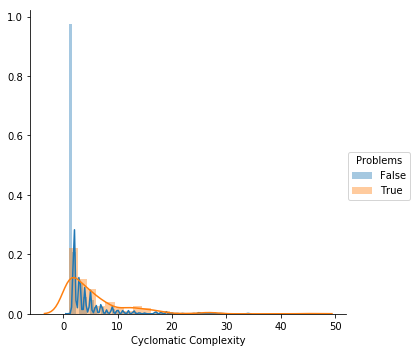

In [45]:
sns.FacetGrid(data=df,hue='Problems',size =5).map(sns.distplot,'Cyclomatic Complexity').add_legend()
plt.show()

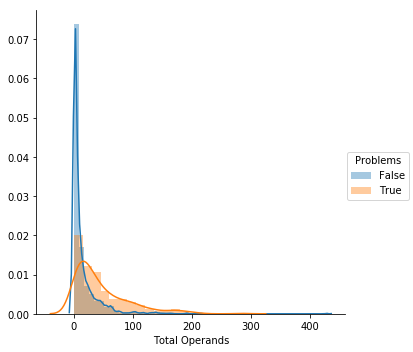

In [68]:
sns.FacetGrid(data=df,hue='Problems',size =5).map(sns.distplot,'Total Operands').add_legend()
plt.show()

In [7]:
def values(x):
    if x == True:
        return 1
    return 0
label = Y['Problems']
Y1 = label.map(values)

In [61]:
X_1, X_test, Y_1, Y_test = cross_validation.train_test_split(df, Y, test_size=0.3, random_state=0)
X_train,X_cv,Y_train,Y_cv = cross_validation.train_test_split(X_1,Y_1,test_size=0.3,random_state=0)

In [9]:
X_train.head()

,Line of Code,Cyclomatic Complexity,Essential Complexity,Design Complexity,Total Operators & Operands,Volume,Program Length,Difficulty,Intelligence,Effort,...,Time Estimator,Line Count,Count of Lines of Comments,Count of blank lines,LOCode & Comment,Unique operator,Unique Operands,Total Operators,Total Operands,Branch Count
1380,2.0,1.0,1.0,1.0,5.0,11.61,0.67,1.50,7.74,17.41,...,0.97,0,0,0,0,3.0,2.0,3.0,2.0,1.0
33,75.0,8.0,3.0,8.0,250.0,1356.57,0.03,29.10,46.62,39470.86,...,2192.83,63,5,5,0,17.0,26.0,161.0,89.0,15.0
7,69.0,12.0,1.0,12.0,231.0,1212.27,0.04,27.27,44.45,33061.94,...,1836.77,62,3,2,0,16.0,22.0,156.0,75.0,23.0
1485,16.0,2.0,1.0,2.0,45.0,194.49,0.13,8.00,24.31,1555.89,...,86.44,13,0,0,0,10.0,10.0,29.0,16.0,3.0
1559,2.0,1.0,1.0,1.0,3.0,4.75,1.00,1.00,4.75,4.75,...,0.26,0,0,0,0,2.0,1.0,2.0,1.0,1.0


In [10]:
scaler = StandardScaler()
# Fit only to the training d
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)
X_train =  pd.DataFrame(data=normalize(X_train))
X_cv = pd.DataFrame(data=normalize(X_cv))
X_test = pd.DataFrame(data=normalize(X_test))

In [11]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.242178,-0.187727,-0.125138,-0.178693,-0.209676,-0.185173,0.434705,-0.270208,-0.248566,-0.116031,...,-0.116031,-0.233673,-0.123456,-0.189115,-0.071476,-0.318001,-0.243659,-0.211121,-0.205747,-0.187342
1,0.228788,0.163037,0.072879,0.190587,0.295819,0.258965,-0.119145,0.365289,0.150252,0.239376,...,0.239376,0.246300,0.180791,0.111163,-0.023348,0.212644,0.170657,0.309614,0.271169,0.163806
2,0.206736,0.295900,-0.041531,0.338173,0.271846,0.228285,-0.116905,0.340578,0.139531,0.197442,...,0.197442,0.245037,0.093820,0.007518,-0.023722,0.193075,0.131011,0.302394,0.220184,0.297056
3,-0.133438,-0.194708,-0.271909,-0.151702,-0.059953,-0.113419,-0.521112,0.123391,0.116030,-0.180200,...,-0.180200,-0.064898,-0.268255,-0.410924,-0.155310,0.361750,0.025434,-0.044346,-0.084858,-0.193259
4,-0.188417,-0.146054,-0.097359,-0.139025,-0.170214,-0.147948,0.658914,-0.229795,-0.235780,-0.090486,...,-0.090488,-0.181801,-0.096051,-0.147134,-0.055610,-0.301257,-0.214405,-0.169962,-0.169337,-0.145755


In [12]:
X_cv.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.203711,-0.166803,-0.111189,-0.158775,-0.202484,-0.172034,-0.357381,-0.307139,-0.346188,-0.103431,...,-0.103432,-0.193697,-0.109695,-0.168036,-0.063509,-0.405550,-0.273225,-0.200624,-0.203972,-0.166460
1,0.258886,0.176616,0.192449,0.127611,0.172532,0.138616,-0.239199,0.137944,0.426478,-0.009568,...,-0.009569,0.217656,0.127069,0.384883,-0.061656,0.322717,0.340513,0.184867,0.151185,0.177920
2,-0.248379,-0.182789,-0.121846,-0.173992,-0.208593,-0.182858,0.423270,-0.263100,-0.284791,-0.113093,...,-0.113092,-0.227526,-0.120209,-0.184141,-0.069596,-0.309636,-0.268331,-0.205568,-0.211928,-0.182414
3,0.206452,0.060365,0.126302,0.022113,0.226620,0.218126,-0.178198,0.214417,0.349737,0.073770,...,0.073770,0.178346,0.006752,0.252594,-0.040464,0.368524,0.476465,0.191919,0.281216,0.061061
4,-0.184263,-0.189277,-0.264325,-0.147470,-0.212126,-0.239391,-0.480192,0.048754,-0.243268,-0.209084,...,-0.209088,-0.162433,-0.260773,0.047849,-0.150978,0.059270,-0.244975,-0.213540,-0.208242,-0.187868


X_train.head()

In [14]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.242178,-0.187727,-0.125138,-0.178693,-0.209676,-0.185173,0.434705,-0.270208,-0.248566,-0.116031,...,-0.116031,-0.233673,-0.123456,-0.189115,-0.071476,-0.318001,-0.243659,-0.211121,-0.205747,-0.187342
1,0.228788,0.163037,0.072879,0.190587,0.295819,0.258965,-0.119145,0.365289,0.150252,0.239376,...,0.239376,0.246300,0.180791,0.111163,-0.023348,0.212644,0.170657,0.309614,0.271169,0.163806
2,0.206736,0.295900,-0.041531,0.338173,0.271846,0.228285,-0.116905,0.340578,0.139531,0.197442,...,0.197442,0.245037,0.093820,0.007518,-0.023722,0.193075,0.131011,0.302394,0.220184,0.297056
3,-0.133438,-0.194708,-0.271909,-0.151702,-0.059953,-0.113419,-0.521112,0.123391,0.116030,-0.180200,...,-0.180200,-0.064898,-0.268255,-0.410924,-0.155310,0.361750,0.025434,-0.044346,-0.084858,-0.193259
4,-0.188417,-0.146054,-0.097359,-0.139025,-0.170214,-0.147948,0.658914,-0.229795,-0.235780,-0.090486,...,-0.090488,-0.181801,-0.096051,-0.147134,-0.055610,-0.301257,-0.214405,-0.169962,-0.169337,-0.145755


In [79]:
acc=[]
hidden=[]

for i in range(1,30):
    mlp = MLPClassifier(hidden_layer_sizes=(i,i,i),max_iter=300,activation='relu')
    mlp.fit(X_train,Y_train)
    pred = mlp.predict(X_cv)
    accuracy = accuracy_score(Y_cv,pred)
    hidden.append(i)
    acc.append(accuracy)

E:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


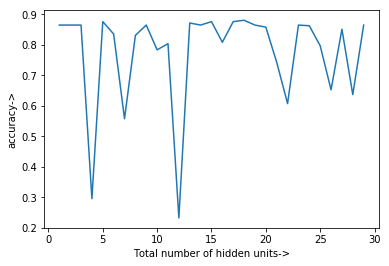

In [80]:
import matplotlib.pyplot as plt

plt.plot(hidden,acc)
plt.xlabel('Total number of hidden units->')
plt.ylabel('accuracy->')
plt.show()

In [84]:
fpr = dict()
tpr = dict()
roc_auc = dict()
mlp = MLPClassifier(hidden_layer_sizes=(7,7,7),max_iter=400,activation='relu')
y_score = mlp.fit(X_train,Y_train)
p=mlp.predict(X_test)
acc = accuracy_score(Y_test,p)
con_matrix=confusion_matrix(Y_test,p)
roc = roc_curve(Y_test,p)
fr, tr, thresholds = metrics.roc_curve(Y_test, p)
#rms = (Y_test.T - p) ** 2
for i in range(len(Y_test)):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:], p)
    roc_auc[i] = auc(fpr[i], tpr[i])
print('Accuracy of network over test data is: ',acc*100)
print('<----------------------------------------------------------------------------------->')
print('Confusion matrix: ')
print(con_matrix)
print('<----------------------------------------------------------------------------------->')

print('True positive rate: ',tr[2])
print('False positive rate: ',fr[2])
print('<----------------------------------------------------------------------------------->')


E:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of network over test data is:  82.62243285939968
<----------------------------------------------------------------------------------->
Confusion matrix: 
[[513  13]
 [ 97  10]]
<----------------------------------------------------------------------------------->
True positive rate:  1.0
False positive rate:  1.0
<----------------------------------------------------------------------------------->


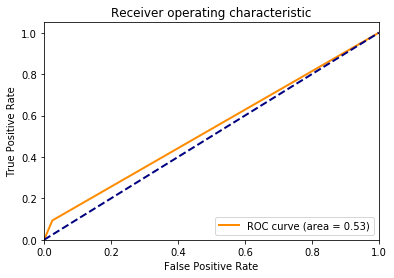

In [85]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [76]:
print(roc_auc)

{0: 0.5753171529085676, 1: 0.5753171529085676, 2: 0.5753171529085676, 3: 0.5753171529085676, 4: 0.5753171529085676, 5: 0.5753171529085676, 6: 0.5753171529085676, 7: 0.5753171529085676, 8: 0.5753171529085676, 9: 0.5753171529085676, 10: 0.5753171529085676, 11: 0.5753171529085676, 12: 0.5753171529085676, 13: 0.5753171529085676, 14: 0.5753171529085676, 15: 0.5753171529085676, 16: 0.5753171529085676, 17: 0.5753171529085676, 18: 0.5753171529085676, 19: 0.5753171529085676, 20: 0.5753171529085676, 21: 0.5753171529085676, 22: 0.5753171529085676, 23: 0.5753171529085676, 24: 0.5753171529085676, 25: 0.5753171529085676, 26: 0.5753171529085676, 27: 0.5753171529085676, 28: 0.5753171529085676, 29: 0.5753171529085676, 30: 0.5753171529085676, 31: 0.5753171529085676, 32: 0.5753171529085676, 33: 0.5753171529085676, 34: 0.5753171529085676, 35: 0.5753171529085676, 36: 0.5753171529085676, 37: 0.5753171529085676, 38: 0.5753171529085676, 39: 0.5753171529085676, 40: 0.5753171529085676, 41: 0.5753171529085676, 4